# Import Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data 

In [2]:
df = pd.read_csv(r'C:\Users\Superuser\Desktop\Datasets\hotel_booking.csv')

df = df.drop(['company', 'agent', 'reservation_status', 'reservation_status_date',
              'name', 'email', 'phone-number', 'credit_card',
              'babies'], axis = 1)


df.dropna(inplace = True)

In [3]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [4]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' '

In [5]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [6]:
resort_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

# Correlation Matrix for Categorical Data

In [7]:

from scipy.stats import chi2_contingency

data = resort_hotel

#categorical variables we want to analyze
categorical_columns = ['is_canceled', 'total_of_special_requests',
       'arrival_date_day_of_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type',
       'customer_type']


correlation_results = []


for i in range(len(categorical_columns) - 1):
    for j in range(i + 1, len(categorical_columns)):
        var1 = categorical_columns[i]
        var2 = categorical_columns[j]

   
        contingency_table = pd.crosstab(data[var1], data[var2])

        chi2, p, _, _ = chi2_contingency(contingency_table)

        correlation_results.append({
            'Variable1': var1,
            'Variable2': var2,
            'Chi2': chi2,
            'P-value': p
        })

correlation_results_df = pd.DataFrame(correlation_results)

print(correlation_results_df.head(20))

                    Variable1                       Variable2         Chi2  \
0                 is_canceled       total_of_special_requests   543.858524   
1                 is_canceled       arrival_date_day_of_month   172.009227   
2                 is_canceled                            meal   483.883625   
3                 is_canceled                         country  3615.049337   
4                 is_canceled                  market_segment  2517.932013   
5                 is_canceled            distribution_channel   700.246348   
6                 is_canceled               is_repeated_guest   433.629074   
7                 is_canceled  previous_bookings_not_canceled   562.772613   
8                 is_canceled              reserved_room_type   266.811082   
9                 is_canceled              assigned_room_type  1326.155126   
10                is_canceled                    deposit_type  4131.549001   
11                is_canceled                   customer_type   

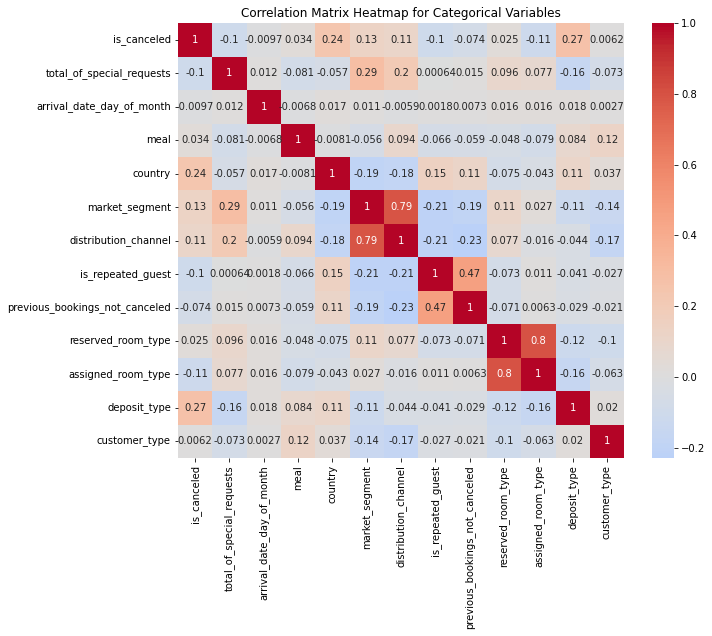

In [8]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
encoded_data = data[categorical_columns].apply(label_encoder.fit_transform)

corr_matrix = encoded_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap for Categorical Variables')
plt.show()


# Corellation for is_cancelled VS numerical

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols



formula = 'is_canceled ~ lead_time + stays_in_week_nights + required_car_parking_spaces + total_of_special_requests'

model = ols(formula, data=data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            is_canceled   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     1147.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:56:56   Log-Likelihood:                -22296.
No. Observations:               39596   AIC:                         4.460e+04
Df Residuals:                   39591   BIC:                         4.465e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

# Choosing Features

In [11]:
#Reassignment for simplification

x = resort_hotel[[ 
    'country', 'deposit_type', 'meal', 'adults', 'stays_in_weekend_nights', 'stays_in_week_nights', 'booking_changes', 'customer_type',
    'lead_time', 'market_segment', 'assigned_room_type', 'reserved_room_type',
    'previous_bookings_not_canceled', 'is_repeated_guest', 'arrival_date_day_of_month' ]]

y = resort_hotel['is_canceled']

In [12]:
x.columns

Index(['country', 'deposit_type', 'meal', 'adults', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'booking_changes', 'customer_type', 'lead_time',
       'market_segment', 'assigned_room_type', 'reserved_room_type',
       'previous_bookings_not_canceled', 'is_repeated_guest',
       'arrival_date_day_of_month'],
      dtype='object')

# Feature Importance

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


target = y
features = x

label_encoder = LabelEncoder()

for col in features.select_dtypes(include=['object']).columns:
    features[col] = label_encoder.fit_transform(features[col])

X = features
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                           Feature  Importance
8                        lead_time    0.244945
0                          country    0.158460
14       arrival_date_day_of_month    0.139166
9                   market_segment    0.076215
5             stays_in_week_nights    0.069486
1                     deposit_type    0.068350
10              assigned_room_type    0.046121
11              reserved_room_type    0.039948
4          stays_in_weekend_nights    0.039793
6                  booking_changes    0.030915
7                    customer_type    0.030809
2                             meal    0.023855
3                           adults    0.020644
12  previous_bookings_not_canceled    0.007851
13               is_repeated_guest    0.003443


# RandomForestClassifier

In [14]:
from sklearn.preprocessing import OneHotEncoder


label_encoder = LabelEncoder()

for col in features.select_dtypes(include=['object']).columns:
    features[col] = label_encoder.fit_transform(features[col])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.5f}")

Accuracy: 0.86515


# LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression


X = features
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.5f}")

Accuracy: 0.77563


# Cross Validation

In [20]:
from sklearn.model_selection import cross_val_score

X = features
y = target

model = RandomForestClassifier() 

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Accuracy Scores: [0.80378788 0.8338174  0.75262028 0.77206718 0.77244602]
Mean Accuracy: 0.7869477512847888


In [21]:
X = features
y = target

model = LogisticRegression() 

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Accuracy Scores: [0.71464646 0.80793029 0.71751484 0.76145978 0.77257229]
Mean Accuracy: 0.754824734272897


# RandomForestClassifier hyperparameter tuning

In [16]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [300],
    'max_depth': [None],
    'min_samples_split': [4],
    'min_samples_leaf': [1,2]
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}
Test Accuracy: 0.8633838383838384
